# K-MEANS CLUSTERING

The following steps are used in K-means clustering algorithm:
1. Decide the value of K (which can be fine-tuned later).
2. Choose K observations from the data that are likely to be in different clusters. There are many
ways of choosing these initial K values; the easiest approach is to choose observations that are
farthest (in one of the parameters of the data).
3. The K observations selected in step 2 are the centroids of those clusters.
4. For remaining observations, find the cluster closest to the centroid. Add the new observation (say
observation j) to the cluster with the closest centroid. Adjust the centroid after adding a new obser-
vation to the cluster. The closest centroid is chosen based upon an appropriate distance measure.
5. Repeat step 4 until all observations are assigned to a cluster.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv("Income Data.csv")
df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


/home/ankit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ankit/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


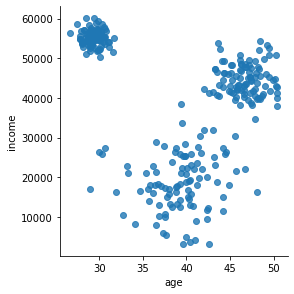

In [3]:
sn.lmplot("age", "income", data=df, fit_reg = False,size = 4);

## K means model creation

In [4]:
from sklearn.cluster import KMeans

In [5]:
clusters = KMeans(3)
clusters.fit(df)

KMeans(n_clusters=3)

In [7]:
df["clusterid"] = clusters.labels_

In [12]:
df.head()

,income,age,clusterid
0,41100.0,48.75,1
1,54100.0,28.10,2
2,47800.0,46.75,1
3,19100.0,40.25,0
4,18200.0,35.80,0


/home/ankit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ankit/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


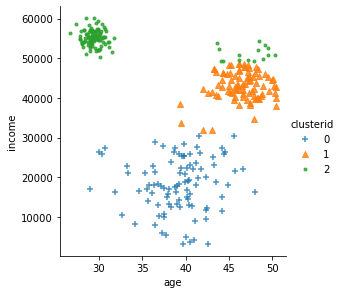

In [13]:
markers = ["+","^","."]
sn.lmplot("age", "income",data = df,hue = "clusterid",fit_reg = False,markers = markers,size = 4)

## Normalizing Features

from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(df[["age","income"]])
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [16]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
df["clusterid_new"] = clusters_new.labels_

/home/ankit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ankit/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


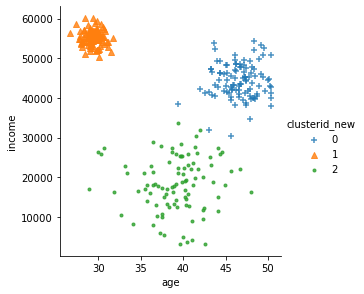

In [17]:
markers = ["+","^","."]
sn.lmplot("age", "income",data = df,hue = "clusterid_new",fit_reg = False,markers = markers,size = 4)

In [18]:
clusters.cluster_centers_

array([[1.81447917e+04, 3.91744792e+01],
       [4.30539326e+04, 4.64191011e+01],
       [5.46756522e+04, 3.17004348e+01]])

## Summarizing model

In [19]:
df.groupby("clusterid")["age","income"].agg(["mean","std"]).reset_index()

<ipython-input-19-b6efdae2aabd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("clusterid")["age","income"].agg(["mean","std"]).reset_index()


clusterid        age                  income             
                  mean       std          mean          std
0         0  39.174479  3.626068  18144.791667  6745.241906
1         1  46.419101  2.289620  43053.932584  3613.769632
2         2  31.700435  6.122122  54675.652174  2362.224320